<a href="https://colab.research.google.com/github/Jaeger47/A.I-Seminar/blob/main/2_1_3_Understand_your_Data_with_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Understand your Data with Visualization
The fastest way to learn more about your data is to use data visualization. In this notebook, you will discover exactly how can you visualize your machine learning data in Python using Pandas, Matplotlib, and Seaborn. You can visualize the data in either:

## 1. Univariate Plots

You can use these three techniques to understand each attribute of your dataset independently.

### 1.1. Histogram

Histogram groups data into bins and provides you a count of the number of observations in each bin. From the shape of the bins, you can quickly get a feeling whether the attribute is Guassian, skewed or even has an exponential distribution. It can also help you see possible outliers.

In [1]:
# Uploading the data from Local File System
from google.colab import files

uploaded = files.upload()
filename = 'pima-indians-diabetes.csv'

Saving pima-indians-diabetes.csv to pima-indians-diabetes.csv


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(filename, names=names, comment='#')

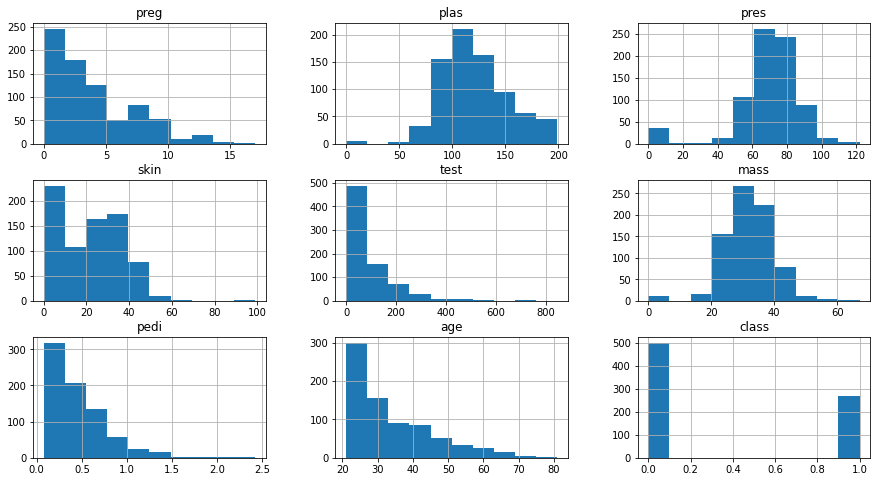

In [3]:
data.hist(figsize=(15, 8))
plt.show()

**Observations:**


*   `age`, `pedi`, and `test` may have an exponential distribution
*   `mass`, `pres`, and `plas` may have a Gaussian or nearly Gaussian distribution



### 1.2. Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute. The plots look like an abstracted histogram with a smooth curve drawn through the top of each bin, much like your eye tried to do with the histograms.

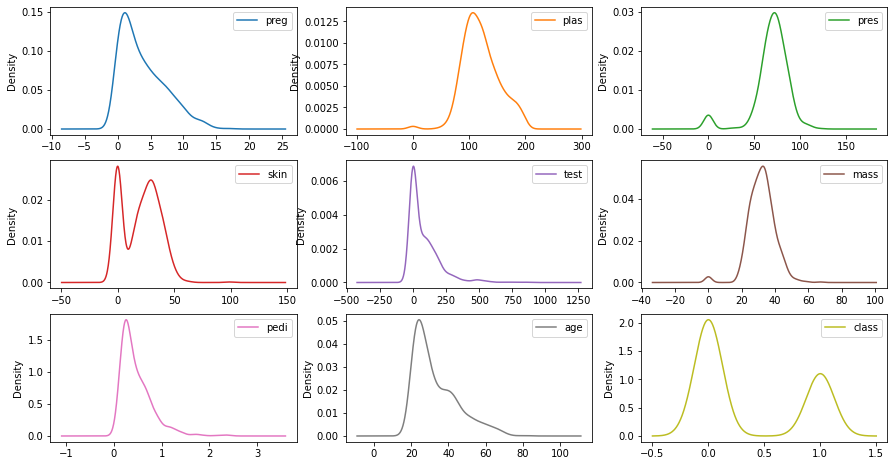

In [4]:
data.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(15,8))
plt.show()

**Observations:**


*   `age`, `pedi`, and `test` may have an exponential distribution
*   `mass`, `pres`, and `plas` may have a Gaussian or nearly Gaussian distribution



### 1.3. Box and Whisker Plots

Boxplots summarize the distribution of each attribute, drawing a line for
the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data. The dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

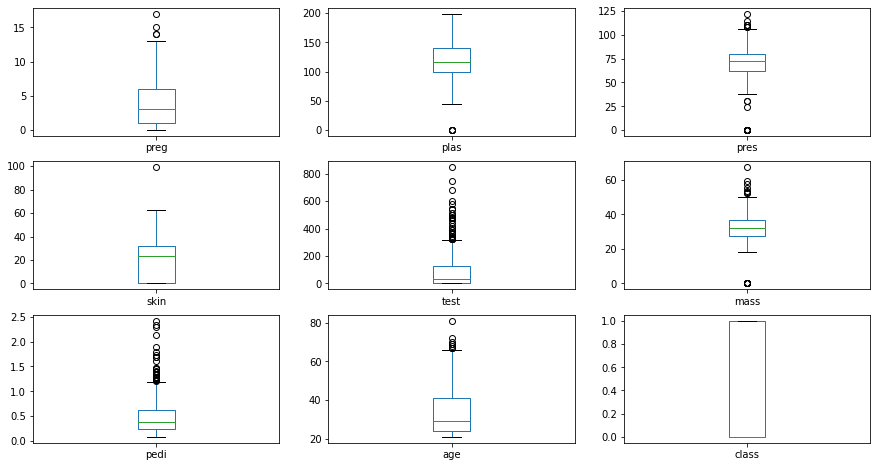

In [5]:
data.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,8))
plt.show()

**Observations:**


*   The spread of attributes is quite different.
*   `age`, `test`, and `skin` appear quite skewed towards smaller values.



## 2. Multivariate Plots

You can use these two plots to show the interaction between multiple variables in your dataset.

### 2.1. Correlation Matrix Plot

Correlation gives an indication of how related the changes are between two variables. You can calculate the correlation between each pair of attributes. This is called a correlation matrix. You can then plot the correlation matrix and get an idea of which variables have a high correlation with each other. This is useful to know, because some machine learning algorithms like linear
and logistic regression can have poor performance if there are highly correlated input variables in your data.

In [6]:
correlations = data.corr() # correlation matrix

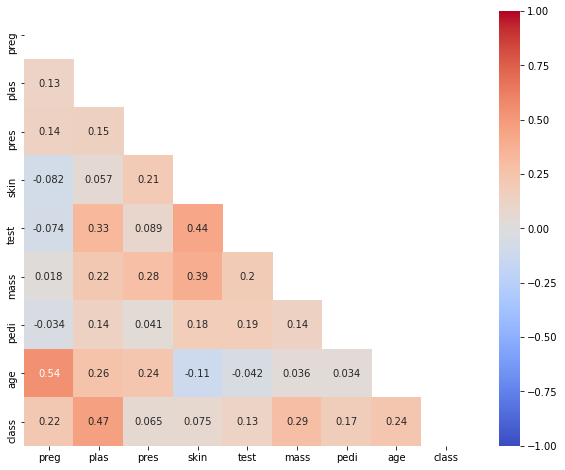

In [7]:
# correlation matrix plot
import seaborn as sns
import numpy as np

matrix = np.triu(correlations)
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations, annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix)
plt.show()

**Observations:**


*   Weak relationships between variables
*   Not subject for attribute deletion or dimension reduction



### 2.2. Scatter Plot Matrix

A scatter plot shows the relationship between two variables as dots in two dimensions, one axis for each attribute. You can create a scatter plot for each pair of attributes in your data. Drawing all these scatter plots together is called a scatter plot matrix. Scatter plots are useful for spotting structured relationships between variables, like whether you could summarize the relationship between two variables with a line. Attributes with structured relationships may also be correlated and good candidates for removal from your dataset.

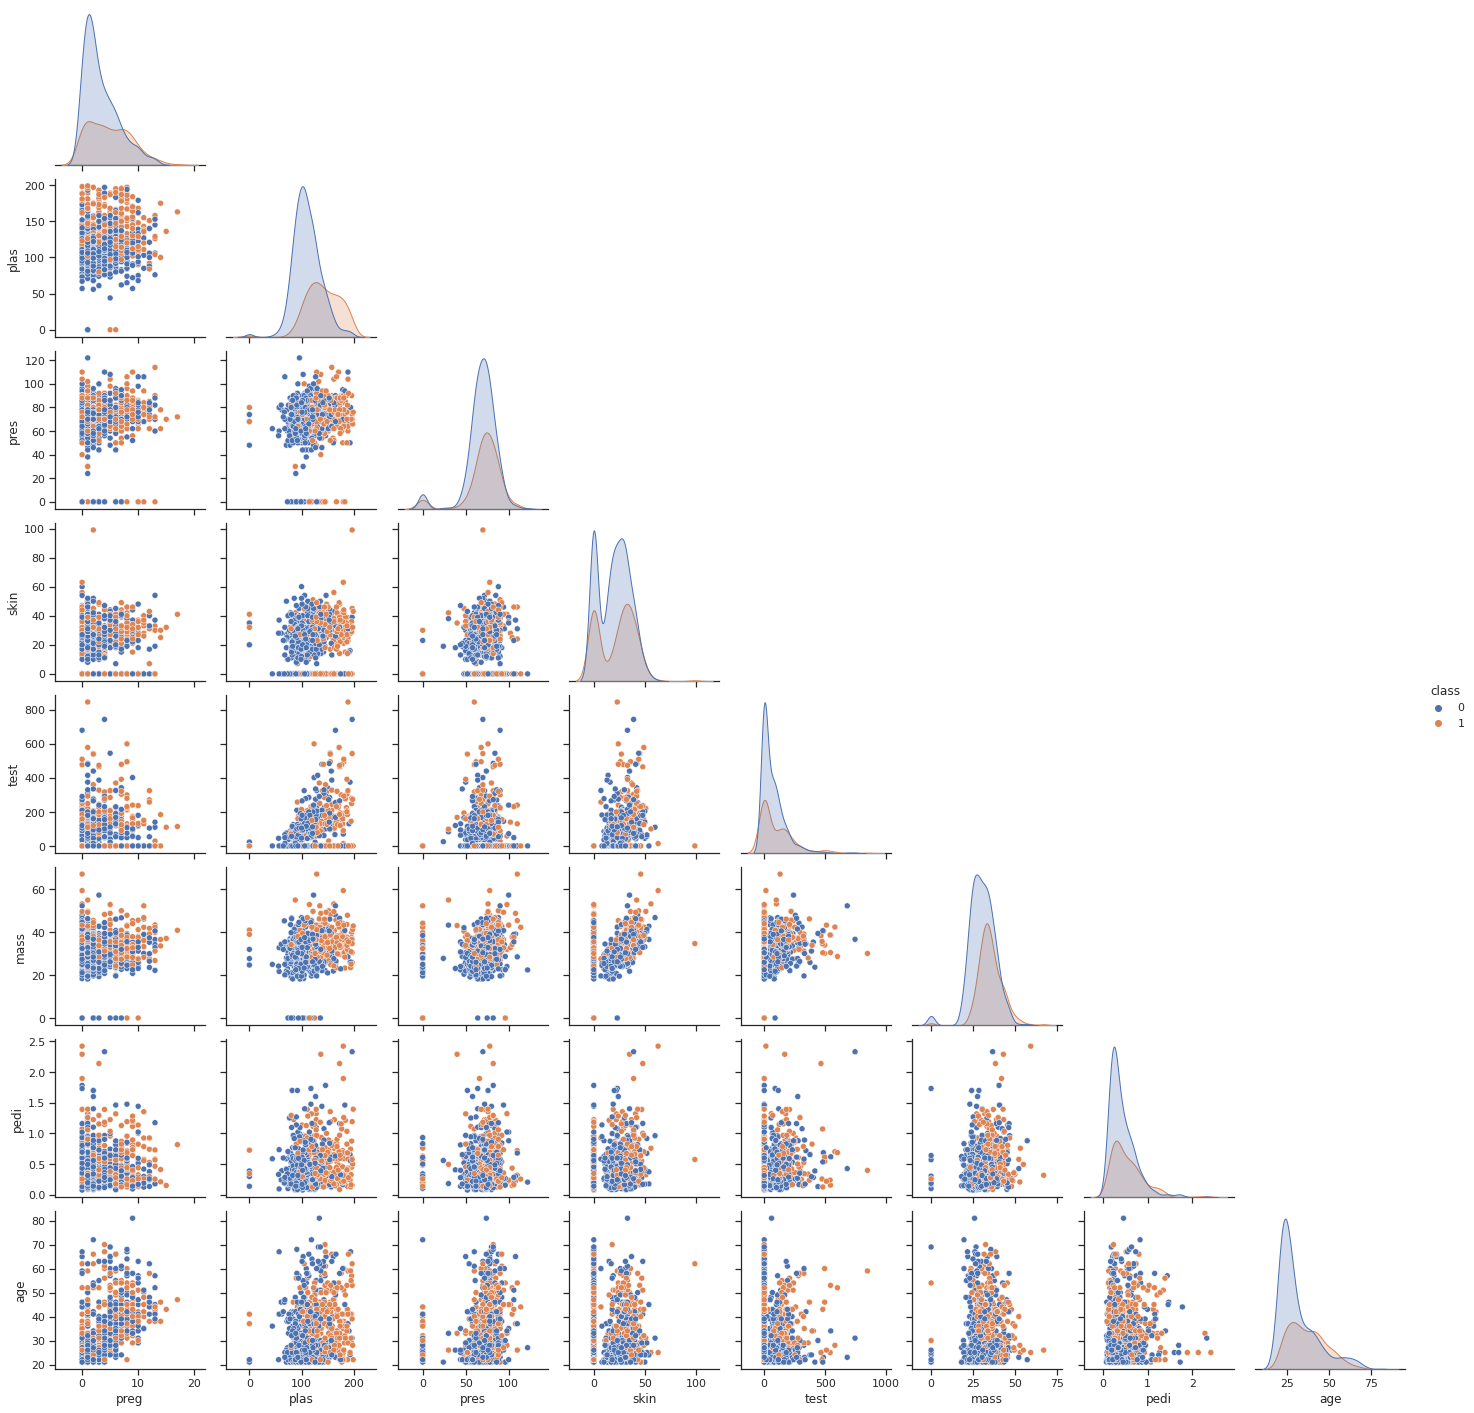

In [8]:
sns.set_theme(style='ticks')
sns.pairplot(data, corner=True, hue='class')
plt.show()

**Observations:**


*   Like the correlation plot matrix, the scatter plot matrix is symmetrical.
*   Symmetrical pairwise relationships from different perspectives
*   If the plots from `plas` versus others have visible boundaries, then the data can be treated as linear. However, these plots do not have clear boundaries. 

